# Лабораторна робота №5  
## Тема: Алгоритми пошуку
## Виконав Варакута Олександр 
## Група КІ-24-1


## **Мета роботи:**  
Ознайомитися з алгоритмами пошуку, реалізувати їх мовою Python, дослідити
їх часову складність теоретично та експериментально, побудувати графіки
залежності часу виконання від розміру вхідних даних.


## Короткі теоретичні відомості

**Алгоритм пошуку** — це алгоритм, призначений для знаходження елемента
заданого значення у структурі даних.

Нехай $n$ — кількість елементів у масиві.

Основні алгоритми пошуку:
- лінійний пошук (метод грубої сили);
- бінарний пошук (для відсортованих масивів).

Часова складність алгоритмів аналізується за допомогою $O$-нотації.


## 1. Лінійний пошук


### 1.1 Теоретичний опис

Лінійний пошук полягає у послідовному перегляді елементів масиву
від першого до останнього, поки не буде знайдено шуканий елемент.

У найгіршому випадку необхідно переглянути всі $n$ елементів.

$$
T(n) = O(n)
$$


In [6]:
def linear_search(arr, x):
    for i in range(len(arr)):
        if arr[i] == x:
            return i
    return -1




In [7]:
a = [32, 1, 3, 4, 2, 1]
linear_search(a, 4)


3

## 2. Бінарний пошук


### 2.1 Теоретичний опис

Бінарний пошук застосовується **лише до відсортованих масивів**.
На кожному кроці масив ділиться навпіл.

Часова складність:

$$
T(n) = T\left(\frac{n}{2}\right) + O(1)
$$

Розв’язок рекурентного співвідношення:

$$
T(n) = O(\log n)
$$


In [8]:
def binary_search(arr, x):
    left, right = 0, len(arr) - 1

    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == x:
            return mid
        elif arr[mid] < x:
            left = mid + 1
        else:
            right = mid - 1

    return -1


In [9]:
b = [1, 2, 3, 4, 5, 6, 7, 8]
binary_search(b, 6)


5

## 3. Експериментальне дослідження часу виконання


Дослідимо залежність часу виконання алгоритмів пошуку
від розміру масиву $n$.

Використаємо значення:

$$
n = [100, 500, 1000, 5000, 10000, 20000]
$$


In [10]:
import random
import time
import matplotlib.pyplot as plt
sizes = [100, 500, 1000, 5000, 10000, 20000]

linear_times = []
binary_times = []

for n in sizes:
    arr = sorted(random.sample(range(n * 3), n))
    x = arr[-1]  # елемент у кінці (гірший випадок)

    start = time.time()
    linear_search(arr, x)
    linear_times.append(time.time() - start)

    start = time.time()
    binary_search(arr, x)
    binary_times.append(time.time() - start)


## 4. Побудова графіка залежності $T(n)$


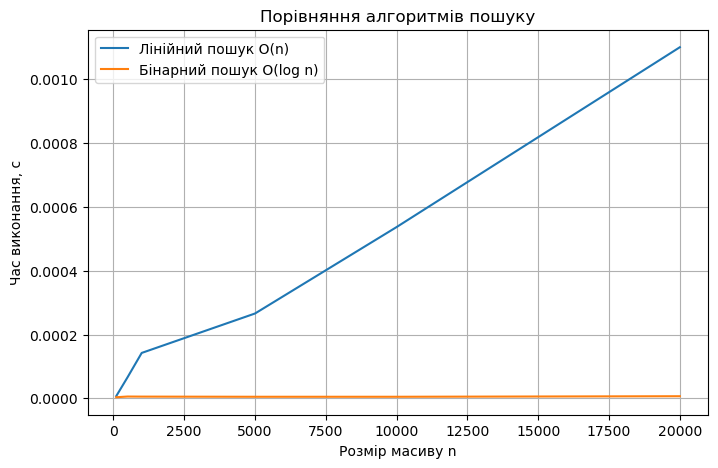

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(sizes, linear_times, label="Лінійний пошук O(n)")
plt.plot(sizes, binary_times, label="Бінарний пошук O(log n)")
plt.xlabel("Розмір масиву n")
plt.ylabel("Час виконання, с")
plt.title("Порівняння алгоритмів пошуку")
plt.legend()
plt.grid(True)
plt.show()


## Аналіз результатів експерименту

З графіка видно, що:
- час виконання лінійного пошуку зростає майже лінійно;
- бінарний пошук зростає значно повільніше;
- при великих $n$ бінарний пошук є значно ефективнішим.


## Контрольні питання

### 1. Яку асимптотичну складність має алгоритм лінійного пошуку?

Лінійний пошук має часову складність $O(n)$, оскільки у найгіршому випадку
потрібно перевірити всі $n$ елементів масиву.

### 2. Яку асимптотичну складність має бінарний пошук?

Бінарний пошук має часову складність $O(\log n)$, оскільки на кожному кроці
розмір задачі зменшується вдвічі.

### 3. Чому бінарний пошук не можна застосовувати до невідсортованого масиву?

Бінарний пошук базується на порівнянні середнього елемента та відкиданні
половини масиву. Це можливо лише тоді, коли масив відсортований.

### 4. Який алгоритм пошуку є ефективнішим і чому?

Бінарний пошук є ефективнішим, оскільки його складність $O(\log n)$ значно
менша за $O(n)$ при великих розмірах масиву.
